# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Loading Medical Appointment datasets
df=pd.read_csv("noshowappointments.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Replace this with more specific notes!)

In [4]:
#checking general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking for duplicates
df.duplicated().sum()

0

In [6]:
#checking null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#converting to pandas datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()
df=df.drop(["Gender","Neighbourhood"],axis=1)

In [8]:
#convering string values into int
df= df.replace({'No-show': {'yes': 1, 'no': 0}})
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,2016-04-29,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,5.590000e+14,5642503,2016-04-29,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,4.260000e+12,5642549,2016-04-29,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,8.680000e+11,5642828,2016-04-29,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,8.840000e+12,5642494,2016-04-29,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,2016-05-03,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,2016-05-03,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,2016-04-27,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,2016-04-27,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,1,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   ScheduledDay    110527 non-null  object             
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(2)
memory usage:

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1:Which attributes the Medical Practitioner should consider that the patients will show up for the appointments?

array([[<AxesSubplot:xlabel='PatientId', ylabel='PatientId'>,
        <AxesSubplot:xlabel='AppointmentID', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Age', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Handcap', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='PatientId'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='AppointmentID', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Age', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Alcoholism

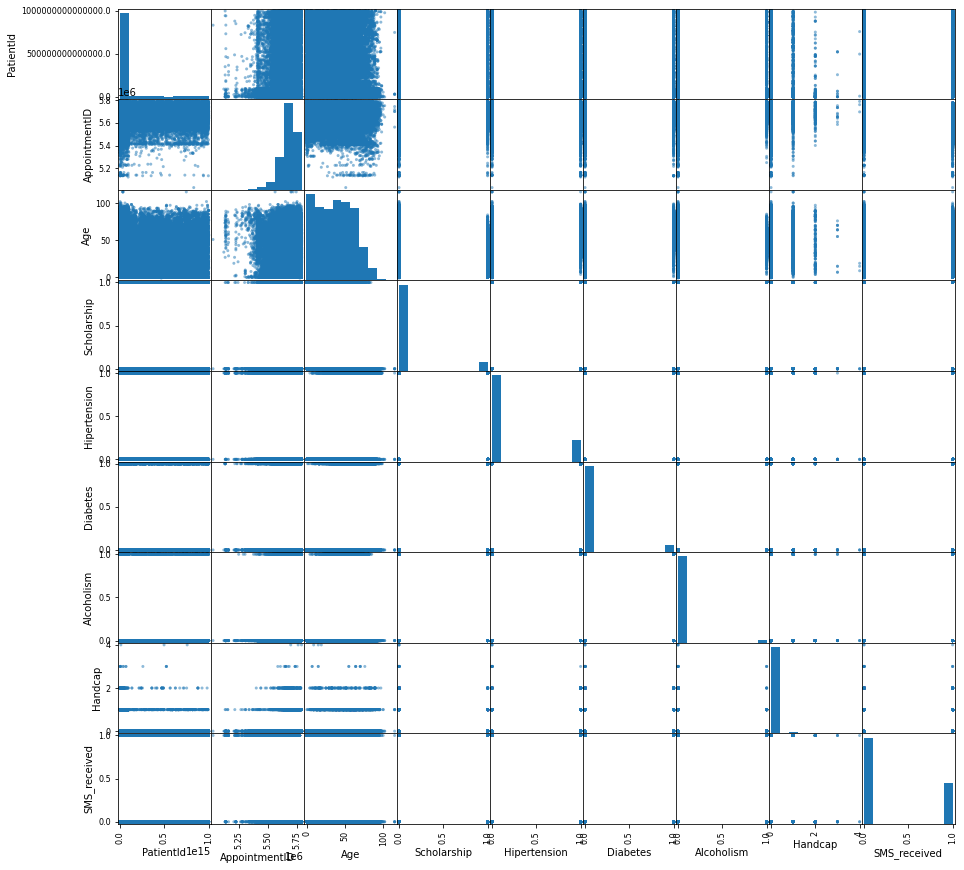

In [10]:
#Plotting the data and finding relatiship between independent variables and dependent variable
pd.plotting.scatter_matrix(df,figsize=(15,15))


### Research Question 2: Is the appointment influenced by the Age of patient?

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

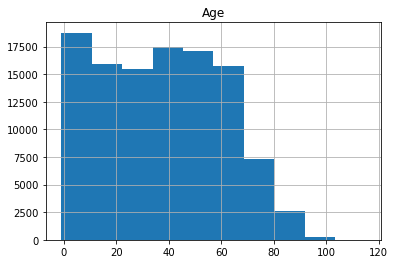

In [11]:
#plotting Age values
df.hist("Age")

<AxesSubplot:ylabel='Frequency'>

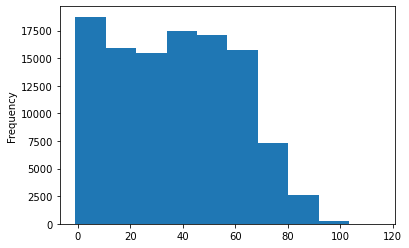

In [12]:
df["Age"].plot(kind="hist")

<AxesSubplot:>

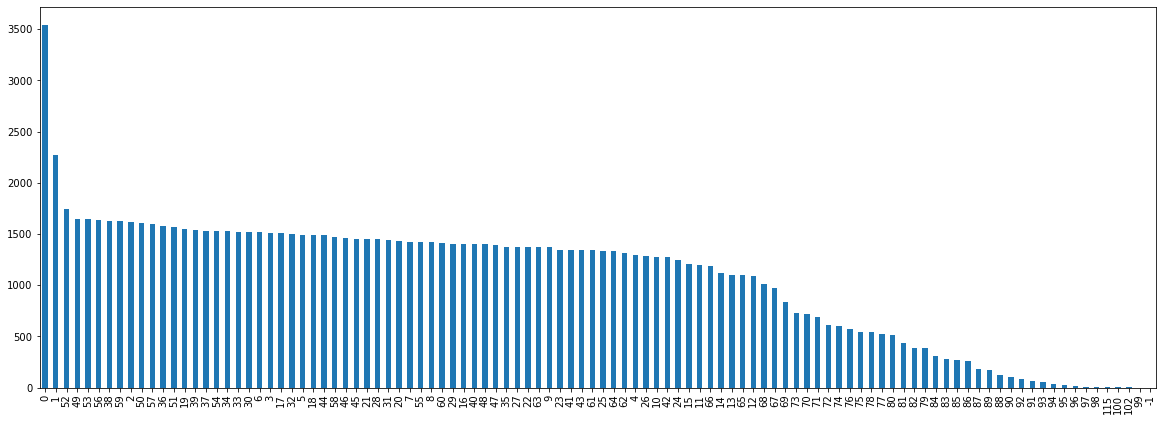

In [13]:
#Age bar chat
df["Age"].value_counts().plot(kind="bar",figsize=(20,7))

In [14]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004035,-0.004143,-0.002881,-0.006438,0.001603,0.010999,-0.007914,-0.009749
AppointmentID,0.004035,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004143,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002881,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006438,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001603,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.010999,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007914,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


<a id='conclusions'></a>
## Conclusions
In summmary, it was found that SMS received was fairly correlated to no of show up. This means that if the patient received an sms, then they are likely to show up for the appointment whereas Age was not the big factor in this study.

<AxesSubplot:xlabel='SMS_received', ylabel='No-show'>

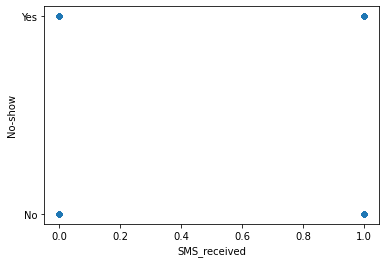

In [15]:
df.plot(x="SMS_received",y="No-show",kind="scatter")

<AxesSubplot:xlabel='Age', ylabel='No-show'>

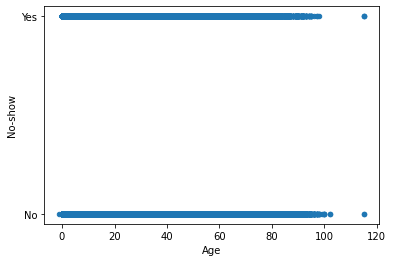

In [16]:
df.plot(x="Age",y="No-show",kind="scatter")